E7. Transportation simplex algorithm

Hiba Nejjari

In [1]:
file_path = 'Transportation_Problem.csv'

In [2]:
import pandas as pd
def read_and_display_data(file_path):
    #read the CSV file
    df = pd.read_csv(file_path, index_col=0)
    #display the dataframe
    print("Data from the CSV file created:")
    print(df)
read_and_display_data(file_path)

Data from the CSV file created:
        D1  D2  D3  D4  Supply
S1       4   3   2   8    50.0
S2       6   7   5   3    60.0
S3       9   4   5   2    25.0
Demand  20  30  40  45     NaN


In [3]:
import numpy as np
import heapq

def read_transportation_data(file_path):
    df = pd.read_csv(file_path, index_col=0)
    cost_matrix = df.iloc[:-1, :-1].values.astype(float)
    supply = df.iloc[:-1, -1].values.astype(int)
    demand = df.iloc[-1, :-1].values.astype(int)
    return cost_matrix, supply, demand

def northwest_corner(supply, demand):
    i, j = 0, 0
    solution = np.zeros_like(supply[:, None] + demand)
    while i < len(supply) and j < len(demand):
        allocation = min(supply[i], demand[j])
        solution[i, j] = allocation
        supply[i] -= allocation
        demand[j] -= allocation
        if supply[i] == 0:
            i += 1
        if demand[j] == 0:
            j += 1
    return solution

def minimum_cost_method(cost_matrix, supply, demand):
    remaining_indices = np.indices(cost_matrix.shape)
    solution = np.zeros_like(cost_matrix)
    while np.any(supply) and np.any(demand):
        min_index = divmod(cost_matrix.argmin(), cost_matrix.shape[1])
        i, j = min_index
        allocation = min(supply[i], demand[j])
        solution[i, j] = allocation
        supply[i] -= allocation
        demand[j] -= allocation
        cost_matrix[i, j] = np.inf
    return solution

def print_solution(solution, method_name):
    print(f"\n{method_name} Solution:")
    print(pd.DataFrame(solution, columns=[f"D{j+1}" for j in range(solution.shape[1])],
                       index=[f"S{i+1}" for i in range(solution.shape[0])]))

def solve_transportation_problem(file_path):
    cost_matrix, supply, demand = read_transportation_data(file_path)
    methods = {
        "Northwest Corner Rule": northwest_corner(supply.copy(), demand.copy()),
        "Minimum Cost Method": minimum_cost_method(cost_matrix.copy(), supply.copy(), demand.copy())
    }
    for name, solution in methods.items():
        print_solution(solution, name)
solve_transportation_problem(file_path)



Northwest Corner Rule Solution:
    D1  D2  D3  D4
S1  20  30   0   0
S2   0   0  40  20
S3   0   0   0  25

Minimum Cost Method Solution:
      D1    D2    D3    D4
S1   0.0  10.0  40.0   0.0
S2  20.0  20.0   0.0  20.0
S3   0.0   0.0   0.0  25.0


In [4]:
def minimum_row_cost_method(cost_matrix, supply, demand):
    solution = np.zeros_like(cost_matrix)
    for i in range(len(supply)):
        while supply[i] > 0:
            j = np.argmin(cost_matrix[i])
            allocation = min(supply[i], demand[j])
            solution[i, j] = allocation
            supply[i] -= allocation
            demand[j] -= allocation
            cost_matrix[i, j] = np.inf
    return solution

def print_solution(solution, method_name):
    print(f"\n{method_name} Solution:")
    print(pd.DataFrame(solution, columns=[f"D{j+1}" for j in range(solution.shape[1])],
                       index=[f"S{i+1}" for i in range(solution.shape[0])]))

def solve_transportation_problem(file_path):
    cost_matrix, supply, demand = read_transportation_data(file_path)
    print_solution(minimum_row_cost_method(cost_matrix.copy(), supply.copy(), demand.copy()), "Minimum Row Cost Method")
solve_transportation_problem(file_path)



Minimum Row Cost Method Solution:
      D1    D2    D3    D4
S1   0.0  10.0  40.0   0.0
S2  15.0   0.0   0.0  45.0
S3   5.0  20.0   0.0   0.0


In [5]:
def vogel_approximation_method(cost_matrix, supply, demand):
    solution = np.zeros_like(cost_matrix)
    costs = cost_matrix.copy()
    
    while np.any(supply > 0) and np.any(demand > 0):
        row_penalties = []
        col_penalties = []
        
        for row in costs:
            filtered_row = row[row != np.inf]
            if len(filtered_row) > 1:
                sorted_row = np.sort(filtered_row)
                row_penalties.append(sorted_row[1] - sorted_row[0])
            elif len(filtered_row) == 1:
                row_penalties.append(0) 
            else:
                row_penalties.append(-1)  
        
        for j in range(costs.shape[1]):
            filtered_col = costs[:, j][costs[:, j] != np.inf]
            if len(filtered_col) > 1:
                sorted_col = np.sort(filtered_col)
                col_penalties.append(sorted_col[1] - sorted_col[0])
            elif len(filtered_col) == 1:
                col_penalties.append(0)  
            else:
                col_penalties.append(-1) 

        row_penalties = np.array(row_penalties)
        col_penalties = np.array(col_penalties)
        
        if np.max(row_penalties) >= np.max(col_penalties):
            i = np.argmax(row_penalties)
            if row_penalties[i] == -1:
                break  # Exit if row is depleted
            j = np.argmin(costs[i])
        else:
            j = np.argmax(col_penalties)
            if col_penalties[j] == -1:
                break  # Exit if column is depleted
            i = np.argmin(costs[:, j])
        
        allocation = min(supply[i], demand[j])
        solution[i, j] = allocation
        supply[i] -= allocation
        demand[j] -= allocation
        costs[i, j] = np.inf  # Set to inf to avoid re-allocation

    return solution

def print_solution(solution, method_name):
    print(f"\n{method_name} Solution:")
    print(pd.DataFrame(solution, columns=[f"D{j+1}" for j in range(solution.shape[1])],
                       index=[f"S{i+1}" for i in range(solution.shape[0])]))

def solve_transportation_problem(file_path):
    cost_matrix, supply, demand = read_transportation_data(file_path)
    print_solution(vogel_approximation_method(cost_matrix, supply, demand), "Vogel's Approximation Method")
solve_transportation_problem(file_path)



Vogel's Approximation Method Solution:
      D1    D2    D3    D4
S1  10.0   0.0  40.0   0.0
S2  10.0   5.0   0.0  45.0
S3   0.0  25.0   0.0   0.0


In [6]:
def select_method():
    while True:
        print("\nSelect a method for finding the initial feasible solution:")
        print("1. Northwest Corner Rule")
        print("2. Minimum Cost Method")
        print("3. Minimum Row Cost Method")
        print("4. Vogel's Approximation Method")
        print("5. Exit")
        choice = input("Enter your choice (1-5): ")
        if choice == '5':
            print("Exiting...")
            exit(0)
        
        methods = {
            '1': ('Northwest Corner Rule', northwest_corner, 2),
            '2': ('Minimum Cost Method', minimum_cost_method, 3),
            '3': ('Minimum Row Cost Method', minimum_row_cost_method, 3),
            '4': ('Vogels Approximation Method', vogel_approximation_method, 3)
        }
        
        if choice in methods:
            return methods[choice]
        else:
            print("Invalid choice, please try again.")


In [7]:
import matplotlib.pyplot as plt
import numpy as np


def plot_solution(cost_matrix, solution, method_name):
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(cost_matrix, cmap='viridis')
    fig.colorbar(cax, label='Transportation Cost')

    for (i, j), val in np.ndenumerate(solution):
        if val > 0:  
            ax.text(j, i, f'{val}', va='center', ha='center', color='white', fontsize=9)

    ax.set_xticks(np.arange(cost_matrix.shape[1]))
    ax.set_yticks(np.arange(cost_matrix.shape[0]))
    ax.set_xticklabels([f'D{j+1}' for j in range(cost_matrix.shape[1])])
    ax.set_yticklabels([f'S{i+1}' for i in range(cost_matrix.shape[0])])
    ax.set_title(f'Solution using {method_name}')
    plt.xlabel('Destinations')
    plt.ylabel('Sources')
    plt.grid(False)
    plt.show()


Select a method for finding the initial feasible solution:
1. Northwest Corner Rule
2. Minimum Cost Method
3. Minimum Row Cost Method
4. Vogel's Approximation Method
5. Exit
Enter your choice (1-5): 2

Minimum Cost Method Solution:
      D1    D2    D3    D4
S1   0.0  10.0  40.0   0.0
S2  20.0  20.0   0.0  20.0
S3   0.0   0.0   0.0  25.0


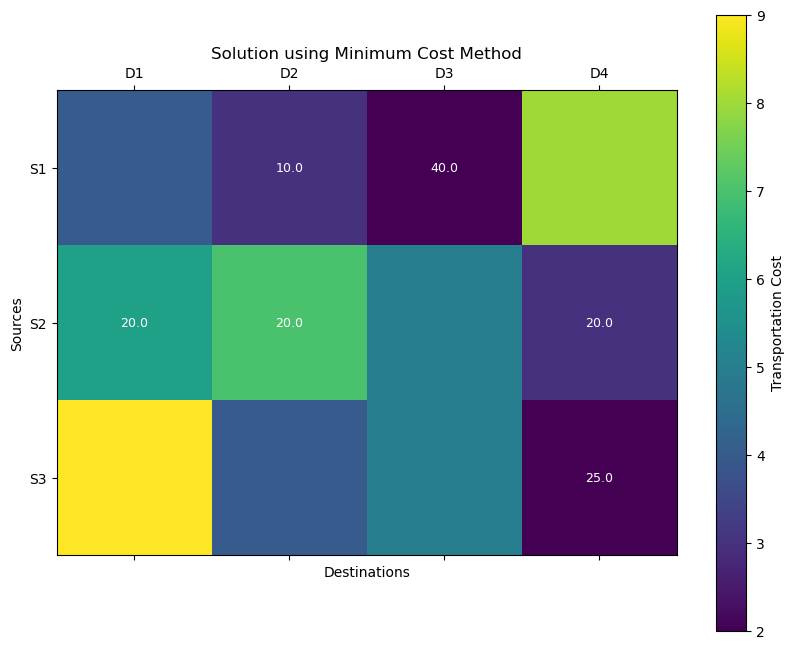

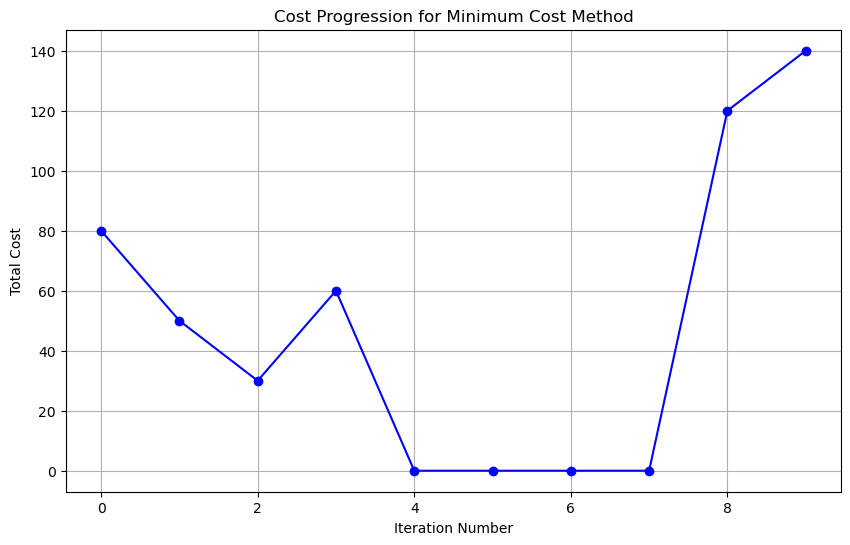


Solution Summary:
Total Cost: $480.00
Total Units Shipped: 135.0
Average Cost per Unit: $3.56
Number of Utilized Routes: 6


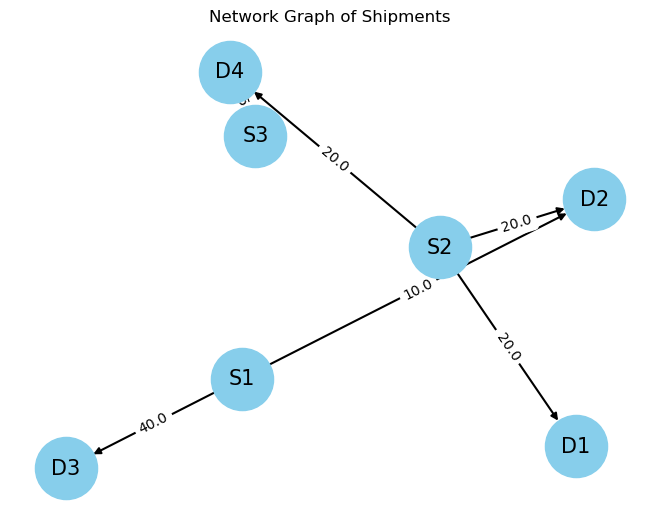

<Figure size 640x480 with 0 Axes>

In [15]:
def solve_transportation_problem(file_path):
    cost_matrix, supply, demand = read_transportation_data(file_path)
    method_name, method_func, num_args = select_method()
    
    if num_args == 2:
        solution = method_func(supply.copy(), demand.copy())
    elif num_args == 3:
        solution, costs = method_func(cost_matrix.copy(), supply.copy(), demand.copy())
    
    print_solution(solution, method_name)
    plot_solution(cost_matrix, solution, method_name)
    plot_cost_progression(costs, method_name)  

    
def minimum_cost_method(cost_matrix, supply, demand):
    solution = np.zeros_like(cost_matrix)
    costs = []
    while np.any(supply) and np.any(demand):
        i, j = divmod(cost_matrix.argmin(), cost_matrix.shape[1])
        allocation = min(supply[i], demand[j])
        solution[i, j] = allocation
        costs.append(cost_matrix[i, j] * allocation)  
        supply[i] -= allocation
        demand[j] -= allocation
        cost_matrix[i, j] = np.inf
    return solution, costs
def print_solution_summary(solution, cost_matrix):
    total_cost = np.sum(solution * cost_matrix)
    total_units = np.sum(solution)
    average_cost = total_cost / total_units if total_units > 0 else 0
    utilized_routes = np.count_nonzero(solution > 0)
    
    print("\nSolution Summary:")
    print(f"Total Cost: ${total_cost:.2f}")
    print(f"Total Units Shipped: {total_units}")
    print(f"Average Cost per Unit: ${average_cost:.2f}")
    print(f"Number of Utilized Routes: {utilized_routes}")

def plot_cost_progression(costs, method_name):
    plt.figure(figsize=(10, 6))
    plt.plot(costs, marker='o', linestyle='-', color='b')
    plt.title(f'Cost Progression for {method_name}')
    plt.xlabel('Iteration Number')
    plt.ylabel('Total Cost')
    plt.grid(True)
    plt.show()

import networkx as nx

def plot_network_graph(cost_matrix, solution):
    G = nx.DiGraph()
    for i in range(len(solution)):
        for j in range(len(solution[i])):
            if solution[i][j] > 0:
                G.add_edge(f'S{i+1}', f'D{j+1}', weight=solution[i][j])

    pos = nx.spring_layout(G)
    edges = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', width=1.5, font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges)
    plt.title('Network Graph of Shipments')
    
    plt.show()
def save_results_to_file(solution, method_name):
    with open(f'{method_name}_results.txt', 'w') as f:
        np.savetxt(f, solution, fmt="%d")

    plt.savefig(f'{method_name}_graph.png')  
def main():

    file_path = 'Transportation_Problem.csv'
    cost_matrix, supply, demand = read_transportation_data(file_path)
    method_name, method_func, num_args = select_method()

    if num_args == 2:
        solution = method_func(supply.copy(), demand.copy())
    elif num_args == 3:
        solution, costs = method_func(cost_matrix.copy(), supply.copy(), demand.copy())

    print_solution(solution, method_name)
    plot_solution(cost_matrix, solution, method_name)


    if 'costs' in locals():
        plot_cost_progression(costs, method_name)

    
    print_solution_summary(solution, cost_matrix)
    plot_network_graph(cost_matrix, solution)

    save_results_to_file(solution, method_name)

if __name__ == '__main__':
    main()
